# Exploring the data for price prediction

### Importing libs and defining functions

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def summary_by_field(dataframe, field, field_sorting=True):
  """
  Returns a summary of the field passed as parameter
  """
  if field not in dataframe.columns:
    raise Exception(f'Field "{field}" not found in dataframe')

  summary = pd.DataFrame(dataframe[field].value_counts())
  summary['percent'] = round((summary[field] / summary[field].sum()) * 100, 2)

  if field_sorting:
    return summary.sort_values(by=field, ascending=False)
  else:
    return summary.sort_index()

In [0]:
def normalize_category(dataframe, field, min_value, max_value):
  """
  Normalizes the dataframe field to a range between min_value and max_value
  """
  if field not in dataframe.columns:
    raise Exception(f'Field "{field}" not found in dataframe')

  dataframe[field] = dataframe[field].apply(lambda x: max_value if x > max_value else x)
  dataframe[field] = dataframe[field].apply(lambda x: min_value if x < min_value else x)

  return dataframe

In [0]:
def normalize_iptu(dataframe):
  """
  Normalizes the dataframe iptu field converting to None when 0 and creating another column to indicate it was 0.
  """
  if 'iptu' not in dataframe.columns:
    raise Exception(f'Field "iptu" not found in dataframe')

  dataframe['iptu'] = dataframe['iptu'].apply(lambda x: None if x == 0 else x)
  dataframe['iptu_is_zero'] = dataframe['iptu'].apply(lambda x: 1 if x is None else 0)

  return dataframe

In [0]:
def hist_plot(dataframe, field):
  """
  Plots a histogram of the field passed as parameter
  """
  plt.figure(figsize=(10, 6))
  plt.hist(
      dataframe[field],
      bins=30,
      edgecolor='black',
      alpha=0.8
  )

  plt.title('Distribution of ' + field, fontsize=16, pad=12)
  plt.xlabel('Value', fontsize=12)
  plt.ylabel('Frequency', fontsize=12)

  plt.grid(axis='y', linestyle='--', alpha=0.4)
  plt.tight_layout()

  plt.show()

### Reading files

In [0]:
path = '/Workspace/Users/vinicius.araujo@quintoandar.com.br/DS Upskilling/Database extraction/available_houses.csv'
df = pd.read_csv(path, index_col=0)
df.reset_index(drop=True, inplace=True)
df.head()

,type,region_name,total_area,bathrooms,bedrooms,iptu,parking_slots,price
0,Apartamento,Brooklin,48,1,1,190,1,990000
1,Apartamento,Brooklin,396,2,4,1500,3,3600000
2,Apartamento,Brooklin,77,1,2,180,1,767000
3,Apartamento,Brooklin,204,4,4,1750,4,3650000
4,Casa,Brooklin,300,2,3,1334,4,2125000


### Basic info

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   type           1346 non-null   object
 1   region_name    1346 non-null   object
 2   total_area     1346 non-null   int64 
 3   bathrooms      1346 non-null   int64 
 4   bedrooms       1346 non-null   int64 
 5   iptu           1346 non-null   int64 
 6   parking_slots  1346 non-null   int64 
 7   price          1346 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 84.3+ KB


### Null values

In [0]:
df.isna().sum()

type             0
region_name      0
total_area       0
bathrooms        0
bedrooms         0
iptu             0
parking_slots    0
price            0
dtype: int64

### Type

In [0]:
summary_by_field(df, 'type')

,type,percent
Apartamento,957,71.1
Casa,389,28.9


### Region name

In [0]:
summary_by_field(df, 'region_name')

,region_name,percent
Mooca,335,24.89
Tatuapé,307,22.81
Santana,257,19.09
Vila Mariana,228,16.94
Brooklin,219,16.27


### Bedrooms

In [0]:
summary_by_field(df, 'bedrooms', field_sorting=False)

,bedrooms,percent
0,1,0.07
1,208,15.45
2,464,34.47
3,477,35.44
4,156,11.59
5,26,1.93
6,10,0.74
7,3,0.22
12,1,0.07


In [0]:
summary_by_field(normalize_category(df, 'bedrooms', 1, 4), 'bedrooms', field_sorting=False)

,bedrooms,percent
1,209,15.53
2,464,34.47
3,477,35.44
4,196,14.56


### Bathrooms

In [0]:
summary_by_field(df, 'bathrooms', field_sorting=False)

,bathrooms,percent
1,446,33.14
2,407,30.24
3,221,16.42
4,152,11.29
5,86,6.39
6,26,1.93
7,8,0.59


In [0]:
summary_by_field(normalize_category(df, 'bathrooms', 1, 5), 'bathrooms', field_sorting=False)

,bathrooms,percent
1,446,33.14
2,407,30.24
3,221,16.42
4,152,11.29
5,120,8.92


### Parking slots

In [0]:
summary_by_field(df, 'parking_slots', field_sorting=False)

,parking_slots,percent
0,228,16.94
1,469,34.84
2,357,26.52
3,133,9.88
4,104,7.73
5,28,2.08
6,12,0.89
7,5,0.37
8,6,0.45
10,3,0.22


In [0]:
summary_by_field(normalize_category(df, 'parking_slots', 0, 5), 'parking_slots', field_sorting=False)

,parking_slots,percent
0,228,16.94
1,469,34.84
2,357,26.52
3,133,9.88
4,104,7.73
5,55,4.09


### Total area

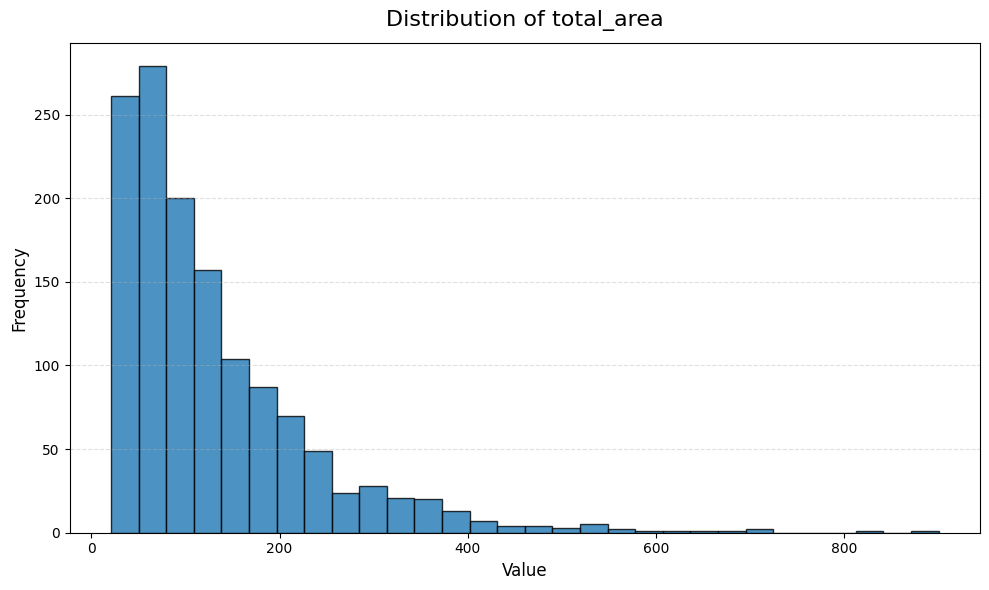

In [0]:
hist_plot('total_area')

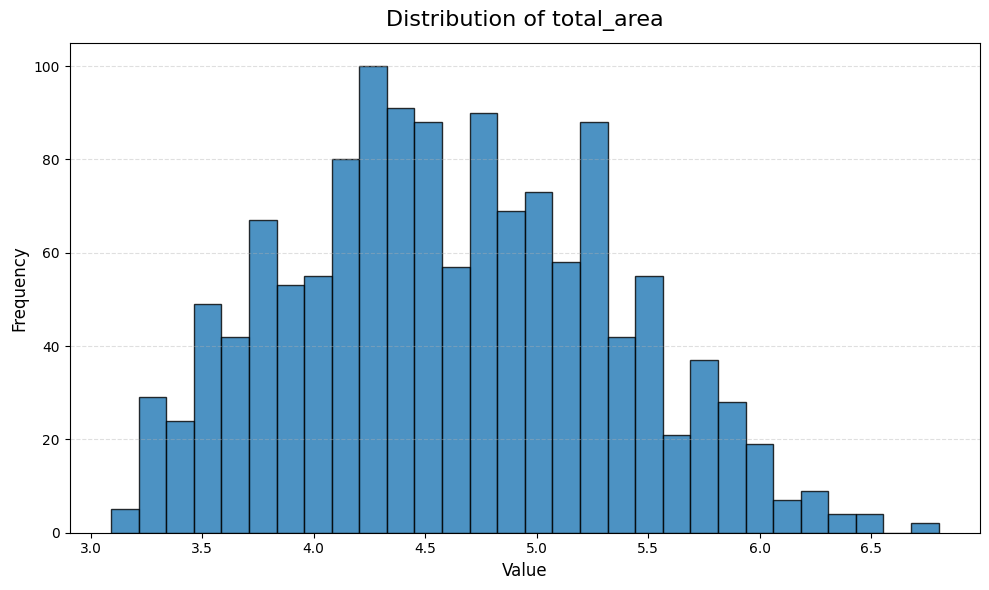

In [0]:
df_analysis = df.copy()
df_analysis['total_area'] = np.log1p(df_analysis['total_area'])
hist_plot(df_analysis, 'total_area')

### Total area

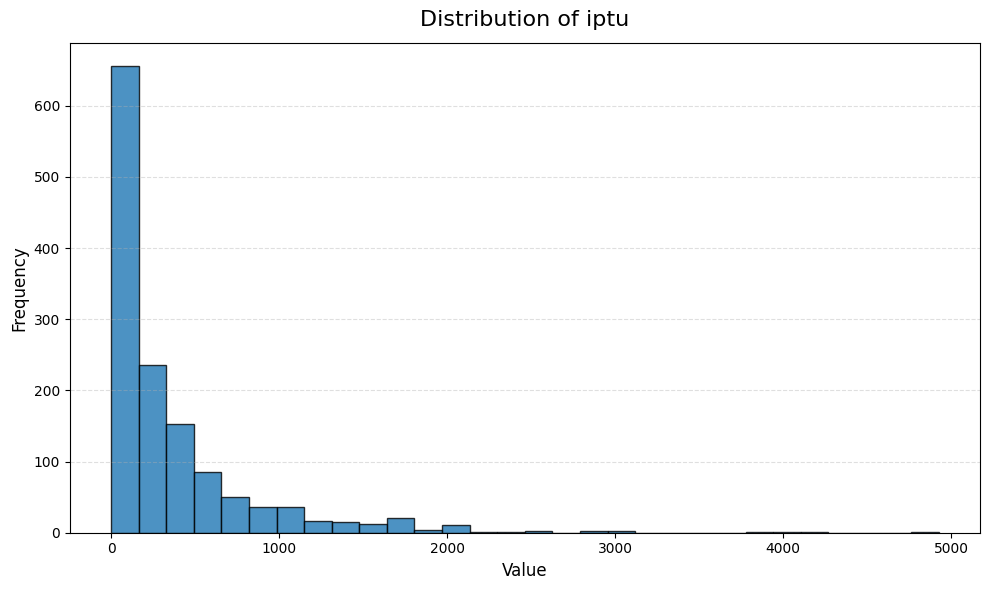

In [0]:
hist_plot(df, 'iptu')

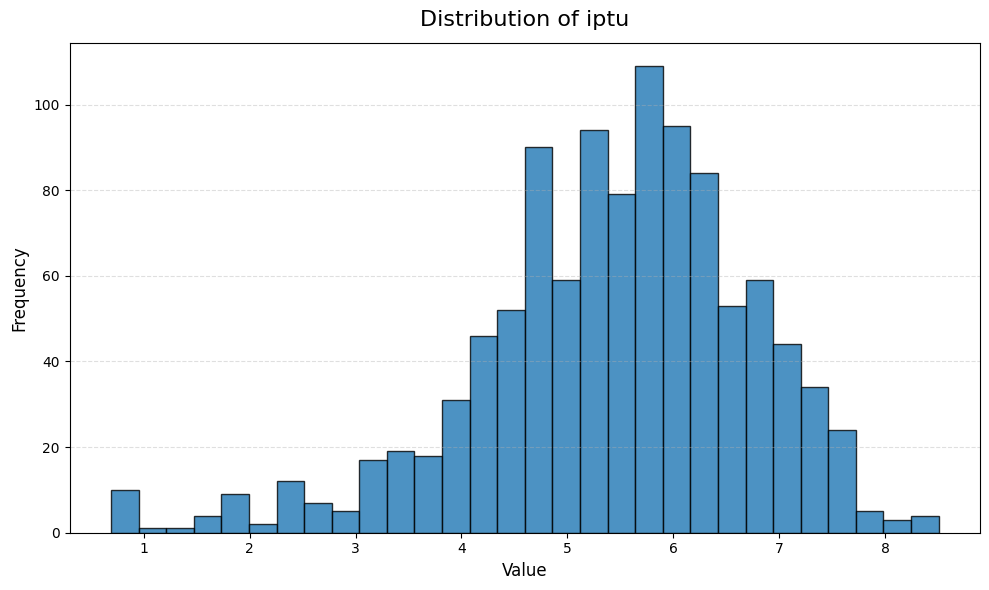

In [0]:
df_analysis = normalize_iptu(df)
df_analysis['iptu'] = np.log1p(df_analysis['iptu'])
hist_plot(df_analysis, 'iptu')

### Price

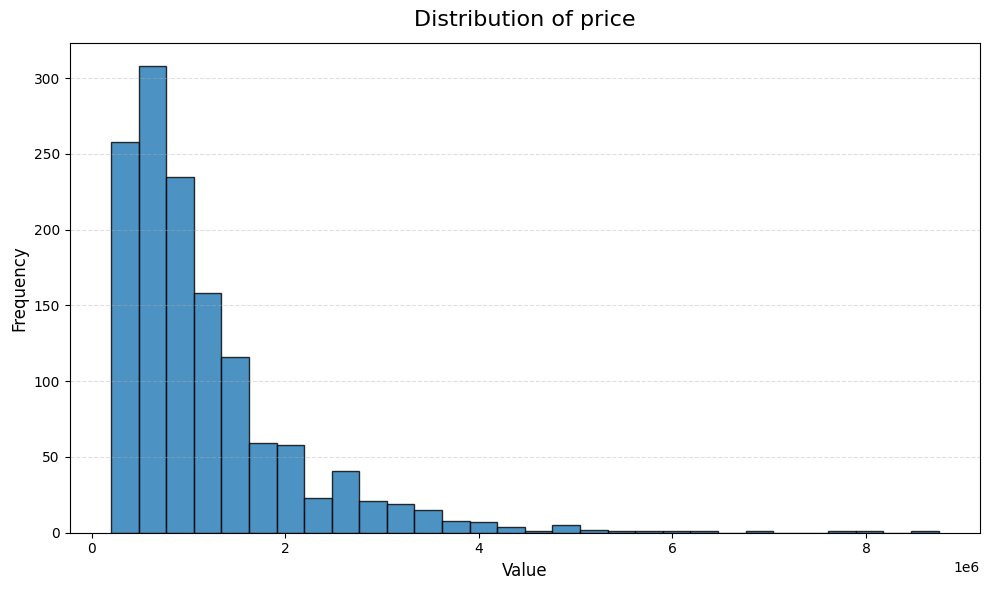

In [0]:
hist_plot('price')

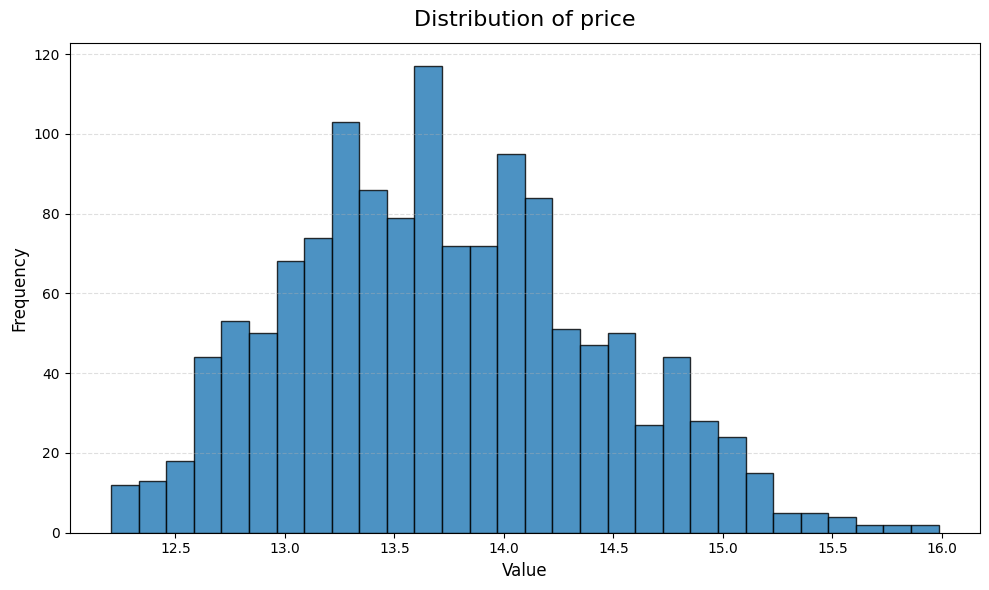

In [0]:
df_analysis = df.copy()
df_analysis['price'] = np.log1p(df_analysis['price'])
hist_plot(df_analysis, 'price')